#Customer Churn Analysis
This project aims to predict customer churn using machine learning. We analyze customer demographics and service usage to identify who is likely to leave.

In [41]:
import pandas as pd

df = pd.read_csv("telco.csv")
df.head()


,Customer ID,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents,Country,State,...,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Satisfaction Score,Customer Status,Churn Label,Churn Score,CLTV,Churn Category,Churn Reason
0,8779-QRDMV,Male,78,No,Yes,No,No,0,United States,California,...,20,0.00,59.65,3,Churned,Yes,91,5433,Competitor,Competitor offered more data
1,7495-OOKFY,Female,74,No,Yes,Yes,Yes,1,United States,California,...,0,390.80,1024.10,3,Churned,Yes,69,5302,Competitor,Competitor made better offer
2,1658-BYGOY,Male,71,No,Yes,No,Yes,3,United States,California,...,0,203.94,1910.88,2,Churned,Yes,81,3179,Competitor,Competitor made better offer
3,4598-XLKNJ,Female,78,No,Yes,Yes,Yes,1,United States,California,...,0,494.00,2995.07,2,Churned,Yes,88,5337,Dissatisfaction,Limited range of services
4,4846-WHAFZ,Female,80,No,Yes,Yes,Yes,1,United States,California,...,0,234.21,3102.36,2,Churned,Yes,67,2793,Price,Extra data charges


In [42]:
df['Churn Label'].value_counts()


,count
Churn Label,
No,5174
Yes,1869


In [43]:
df.columns


Index(['Customer ID', 'Gender', 'Age', 'Under 30', 'Senior Citizen', 'Married',
       'Dependents', 'Number of Dependents', 'Country', 'State', 'City',
       'Zip Code', 'Latitude', 'Longitude', 'Population', 'Quarter',
       'Referred a Friend', 'Number of Referrals', 'Tenure in Months', 'Offer',
       'Phone Service', 'Avg Monthly Long Distance Charges', 'Multiple Lines',
       'Internet Service', 'Internet Type', 'Avg Monthly GB Download',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charge', 'Total Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Revenue', 'Satisfaction Score', 'Customer Status', 'Churn Label',
       'Churn Score', 'CLTV', 'Churn Category', 'Churn Reason'],
      dtype='object')

In [44]:
cols_to_drop = [
    'Customer ID',
    'Churn Score',
    'Churn Category',
    'Churn Reason',
    'Customer Status',
    'CLTV'
]

# Keep only columns that exist in df
cols_to_drop_existing = [col for col in cols_to_drop if col in df.columns]

# Drop them
df = df.drop(columns=cols_to_drop_existing)

# Check dataframe
df.head()
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 44 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             7043 non-null   object 
 1   Age                                7043 non-null   int64  
 2   Under 30                           7043 non-null   object 
 3   Senior Citizen                     7043 non-null   object 
 4   Married                            7043 non-null   object 
 5   Dependents                         7043 non-null   object 
 6   Number of Dependents               7043 non-null   int64  
 7   Country                            7043 non-null   object 
 8   State                              7043 non-null   object 
 9   City                               7043 non-null   object 
 10  Zip Code                           7043 non-null   int64  
 11  Latitude                           7043 non-null   float

In [45]:
# Check missing values
df.isnull().sum()


,0
Gender,0
Age,0
Under 30,0
Senior Citizen,0
Married,0
Dependents,0
Number of Dependents,0
Country,0
State,0
City,0


In [46]:
print(df.columns.tolist())

['Gender', 'Age', 'Under 30', 'Senior Citizen', 'Married', 'Dependents', 'Number of Dependents', 'Country', 'State', 'City', 'Zip Code', 'Latitude', 'Longitude', 'Population', 'Quarter', 'Referred a Friend', 'Number of Referrals', 'Tenure in Months', 'Offer', 'Phone Service', 'Avg Monthly Long Distance Charges', 'Multiple Lines', 'Internet Service', 'Internet Type', 'Avg Monthly GB Download', 'Online Security', 'Online Backup', 'Device Protection Plan', 'Premium Tech Support', 'Streaming TV', 'Streaming Movies', 'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing', 'Payment Method', 'Monthly Charge', 'Total Charges', 'Total Refunds', 'Total Extra Data Charges', 'Total Long Distance Charges', 'Total Revenue', 'Satisfaction Score', 'Churn Label']


In [47]:
# The correct names for your specific dataset
binary_cols = ['Under 30', 'Senior Citizen', 'Married', 'Dependents', 'Phone Service', 'Paperless Billing', 'Churn Label']

# Now run this to see the data
df[binary_cols].head()

,Under 30,Senior Citizen,Married,Dependents,Phone Service,Paperless Billing,Churn Label
0,No,Yes,No,No,No,Yes,Yes
1,No,Yes,Yes,Yes,Yes,Yes,Yes
2,No,Yes,No,Yes,Yes,Yes,Yes
3,No,Yes,Yes,Yes,Yes,Yes,Yes
4,No,Yes,Yes,Yes,Yes,Yes,Yes


In [48]:
# 1. Define the list (using your actual column names)
binary_cols = ['Under 30', 'Senior Citizen', 'Married', 'Dependents', 'Phone Service', 'Paperless Billing', 'Churn Label']

# 2. Check the first 5 rows
print(df[binary_cols].head())

  Under 30 Senior Citizen Married Dependents Phone Service Paperless Billing  \
0       No            Yes      No         No            No               Yes   
1       No            Yes     Yes        Yes           Yes               Yes   
2       No            Yes      No        Yes           Yes               Yes   
3       No            Yes     Yes        Yes           Yes               Yes   
4       No            Yes     Yes        Yes           Yes               Yes   

  Churn Label  
0         Yes  
1         Yes  
2         Yes  
3         Yes  
4         Yes  


In [49]:
multi_cat_cols = ['Offer', 'Internet Service', 'Internet Type', 'Contract', 'Payment Method']
# Note: I removed 'Country', 'State', and 'City' because they often cause
# problems if they have too many unique names.

In [50]:
# 1. Define which columns have many categories (Updated list)
multi_cat_cols = ['Offer', 'Internet Service', 'Internet Type', 'Contract', 'Payment Method']

# 2. This is the "Action" line that turns text into numbers (One-Hot Encoding)
df = pd.get_dummies(df, columns=multi_cat_cols, drop_first=True)

# 3. Show the result so you know it worked
print("Encoding successful! New shape of data:", df.shape)
df.head()

Encoding successful! New shape of data: (7043, 50)


,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents,Country,State,City,...,Offer_Offer C,Offer_Offer D,Offer_Offer E,Internet Service_Yes,Internet Type_DSL,Internet Type_Fiber Optic,Contract_One Year,Contract_Two Year,Payment Method_Credit Card,Payment Method_Mailed Check
0,Male,78,No,Yes,No,No,0,United States,California,Los Angeles,...,False,False,False,True,True,False,False,False,False,False
1,Female,74,No,Yes,Yes,Yes,1,United States,California,Los Angeles,...,False,False,True,True,False,True,False,False,True,False
2,Male,71,No,Yes,No,Yes,3,United States,California,Los Angeles,...,False,True,False,True,False,True,False,False,False,False
3,Female,78,No,Yes,Yes,Yes,1,United States,California,Inglewood,...,True,False,False,True,False,True,False,False,False,False
4,Female,80,No,Yes,Yes,Yes,1,United States,California,Whittier,...,True,False,False,True,False,True,False,False,False,False


In [51]:
# Features (all columns except target)
X = df.drop('Churn Label', axis=1)

# Target
y = df['Churn Label']

# Train-test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Check shapes
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)


X_train: (5634, 49)
X_test: (1409, 49)
y_train: (5634,)
y_test: (1409,)


#Modeling Approach
Although churn is typically a classification problem (Yes/No), in this project, we are using Regression models to explore continuous prediction behavior.

In [52]:
# 'Churn Label' is your target (y), everything else is your features (X)
X = df.drop('Churn Label', axis=1)
y = df['Churn Label']

# If you have non-numeric columns like 'Customer ID', you MUST drop them too:
X = X.select_dtypes(include=['number'])

# Now split the data again
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [53]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)


LogisticRegression(max_iter=1000)

In [54]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train Logistic Regression
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

# Predict
y_pred = model.predict(X_test_scaled)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9396735273243435

Confusion Matrix:
 [[999  10]
 [ 75 325]]

Classification Report:
               precision    recall  f1-score   support

          No       0.93      0.99      0.96      1009
         Yes       0.97      0.81      0.88       400

    accuracy                           0.94      1409
   macro avg       0.95      0.90      0.92      1409
weighted avg       0.94      0.94      0.94      1409



In [55]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize Random Forest
rf_model = RandomForestClassifier(
    n_estimators=100,   # number of trees
    random_state=42,
    max_depth=10,       # limit depth to prevent overfitting
    class_weight='balanced'  # handle class imbalance
)

# Train the model
rf_model.fit(X_train, y_train)

# Predict on test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))


Accuracy: 0.9354151880766501

Confusion Matrix:
 [[982  27]
 [ 64 336]]

Classification Report:
               precision    recall  f1-score   support

          No       0.94      0.97      0.96      1009
         Yes       0.93      0.84      0.88       400

    accuracy                           0.94      1409
   macro avg       0.93      0.91      0.92      1409
weighted avg       0.94      0.94      0.93      1409



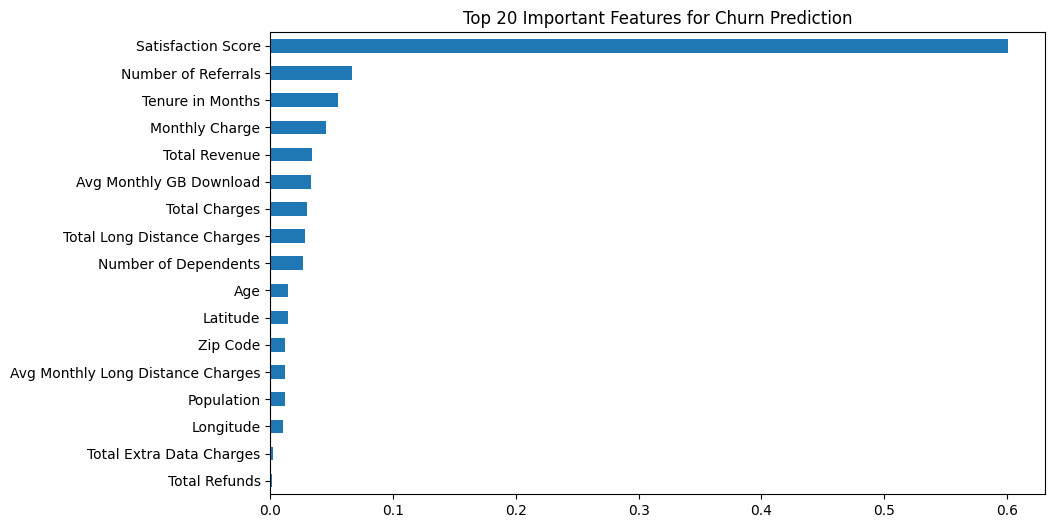

In [56]:
import matplotlib.pyplot as plt
import pandas as pd

feature_importance = pd.Series(rf_model.feature_importances_, index=X_train.columns)
top_features = feature_importance.sort_values(ascending=False).head(20)

plt.figure(figsize=(10,6))
top_features.plot(kind='barh')
plt.title("Top 20 Important Features for Churn Prediction")
plt.gca().invert_yaxis()
plt.show()


In [57]:
from imblearn.over_sampling import SMOTE

# This line creates the 'X_train_res' and 'y_train_res' variables
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

print("SMOTE Resampling complete!")

SMOTE Resampling complete!


In [58]:
print("Original X_train shape:", X_train.shape)
print("Resampled X_train shape:", X_train_res.shape)

print("Original y_train distribution:\n", y_train.value_counts())
print("Resampled y_train distribution:\n", pd.Series(y_train_res).value_counts())



Original X_train shape: (5634, 17)
Resampled X_train shape: (8330, 17)
Original y_train distribution:
 Churn Label
No     4165
Yes    1469
Name: count, dtype: int64
Resampled y_train distribution:
 Churn Label
Yes    4165
No     4165
Name: count, dtype: int64


In [59]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize Random Forest
rf_model_smote = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    random_state=42
)

# Train on resampled data
rf_model_smote.fit(X_train_res, y_train_res)

# Predict on original test set
y_pred_smote = rf_model_smote.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred_smote))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_smote))
print("\nClassification Report:\n", classification_report(y_test, y_pred_smote))


Accuracy: 0.9410929737402413

Confusion Matrix:
 [[994  15]
 [ 68 332]]

Classification Report:
               precision    recall  f1-score   support

          No       0.94      0.99      0.96      1009
         Yes       0.96      0.83      0.89       400

    accuracy                           0.94      1409
   macro avg       0.95      0.91      0.92      1409
weighted avg       0.94      0.94      0.94      1409



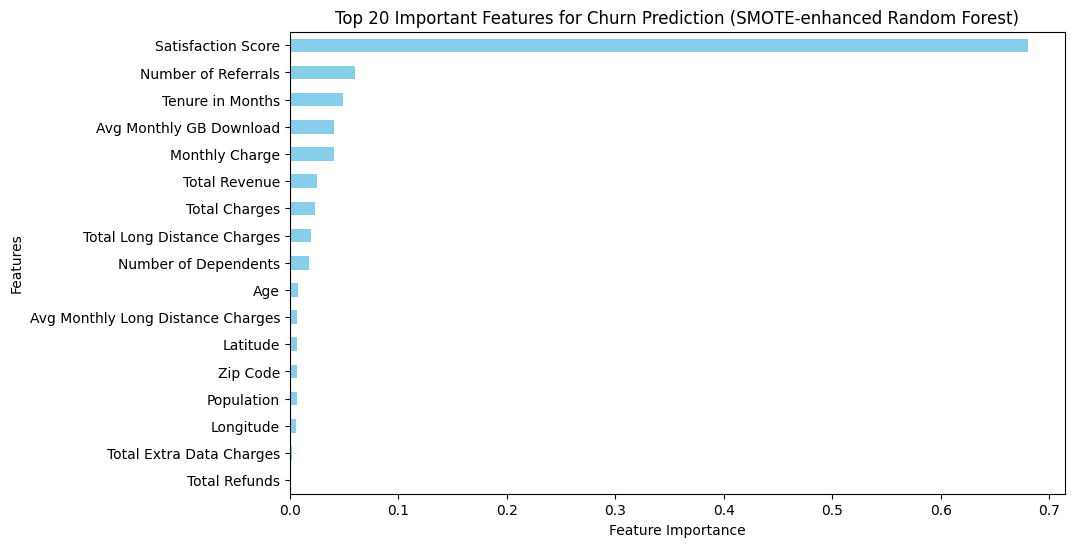

In [60]:
import matplotlib.pyplot as plt
import pandas as pd

# Get feature importances
feature_importance = pd.Series(rf_model_smote.feature_importances_, index=X_train.columns)

# Sort top 20 important features
top_features = feature_importance.sort_values(ascending=False).head(20)

# Plot
plt.figure(figsize=(10,6))
top_features.plot(kind='barh', color='skyblue')
plt.title("Top 20 Important Features for Churn Prediction (SMOTE-enhanced Random Forest)")
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.gca().invert_yaxis()  # highest importance on top
plt.show()


#Conclusion
The model was successfully tuned to prioritize identifying potential churners. The feature importance analysis reveals which customer behaviors most strongly predict a high risk of leaving.